<a href="https://colab.research.google.com/github/brenolucas00/datascienceproject/blob/main/Projeto_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.metrics import  silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
import re

In [2]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


## Banco de dados encontrado em:
https://www.kaggle.com/datasets/kianwee/agricultural-raw-material-prices-19902020

## Análise de dados


In [3]:
df=pd.read_csv('/content/drive/MyDrive/agricultural_raw_material.csv')
df

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
0,Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,...,312.36,-,0.84,-,120.66,-,218.76,-,829.29,-
1,May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,...,350.12,12.09%,0.85,1.19%,124.28,3.00%,213.00,-2.63%,842.51,1.59%
2,Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,...,373.94,6.80%,0.85,0.00%,129.45,4.16%,200.00,-6.10%,831.35,-1.32%
3,Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,...,378.48,1.21%,0.86,1.18%,124.23,-4.03%,210.05,5.03%,798.83,-3.91%
4,Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,...,364.60,-3.67%,0.88,2.33%,129.70,4.40%,208.30,-0.83%,818.74,2.49%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,Dec-19,NaN,NaN,NaN,NaN,1.67,1.21%,NaN,NaN,272.80,...,500.37,-0.22%,1.66,7.79%,NaN,NaN,NaN,NaN,875.00,0.00%
357,Jan-20,NaN,NaN,NaN,NaN,1.74,4.19%,NaN,NaN,272.40,...,499.64,-0.15%,1.68,1.20%,NaN,NaN,NaN,NaN,875.00,0.00%
358,Feb-20,NaN,NaN,NaN,NaN,1.69,-2.87%,NaN,NaN,270.56,...,496.28,-0.67%,1.61,-4.17%,NaN,NaN,NaN,NaN,875.00,0.00%
359,Mar-20,NaN,NaN,NaN,NaN,1.49,-11.83%,NaN,NaN,276.93,...,507.96,2.35%,1.50,-6.83%,NaN,NaN,NaN,NaN,875.00,0.00%


####Passando as colunas para português

In [4]:
df.columns=['Mês',
 'Preço de lã grossa',
 'Variação de % do preço da lã grossa',
 'Preço da Copra',
 'Preço da Copra % Alteração',
 'Preço do algodão',
 'Alteração de % do preço do algodão',
 'Preço de lã fina',
 'Variação de % de preço de lã fina',
 'Preço do registro rígido',
 'Alteração de % do preço do registro rígido',
 'Preço de madeira serrada dura',
 'Mudança de % de preço de madeira serrada dura',
 'Ocultar preço',
 'Ocultar alteração de % de preço',
 'Preço da madeira compensada',
 'Variação de % do preço da madeira compensada',
 'Preço da borracha',
 'Preço da borracha % Variação',
 'Preço do Softlog',
 'Alteração de % de preço do softlog',
 'Preço de madeira serrada macia',
 'Variação de % de preço de madeira serrada macia',
 'Preço da polpa de madeira',
 'Preço da polpa de madeira % Variação']

In [5]:
df

,Mês,Preço de lã grossa,Variação de % do preço da lã grossa,Preço da Copra,Preço da Copra % Alteração,Preço do algodão,Alteração de % do preço do algodão,Preço de lã fina,Variação de % de preço de lã fina,Preço do registro rígido,...,Preço da madeira compensada,Variação de % do preço da madeira compensada,Preço da borracha,Preço da borracha % Variação,Preço do Softlog,Alteração de % de preço do softlog,Preço de madeira serrada macia,Variação de % de preço de madeira serrada macia,Preço da polpa de madeira,Preço da polpa de madeira % Variação
0,Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,...,312.36,-,0.84,-,120.66,-,218.76,-,829.29,-
1,May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,...,350.12,12.09%,0.85,1.19%,124.28,3.00%,213.00,-2.63%,842.51,1.59%
2,Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,...,373.94,6.80%,0.85,0.00%,129.45,4.16%,200.00,-6.10%,831.35,-1.32%
3,Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,...,378.48,1.21%,0.86,1.18%,124.23,-4.03%,210.05,5.03%,798.83,-3.91%
4,Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,...,364.60,-3.67%,0.88,2.33%,129.70,4.40%,208.30,-0.83%,818.74,2.49%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,Dec-19,NaN,NaN,NaN,NaN,1.67,1.21%,NaN,NaN,272.80,...,500.37,-0.22%,1.66,7.79%,NaN,NaN,NaN,NaN,875.00,0.00%
357,Jan-20,NaN,NaN,NaN,NaN,1.74,4.19%,NaN,NaN,272.40,...,499.64,-0.15%,1.68,1.20%,NaN,NaN,NaN,NaN,875.00,0.00%
358,Feb-20,NaN,NaN,NaN,NaN,1.69,-2.87%,NaN,NaN,270.56,...,496.28,-0.67%,1.61,-4.17%,NaN,NaN,NaN,NaN,875.00,0.00%
359,Mar-20,NaN,NaN,NaN,NaN,1.49,-11.83%,NaN,NaN,276.93,...,507.96,2.35%,1.50,-6.83%,NaN,NaN,NaN,NaN,875.00,0.00%


In [6]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 25 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Mês                                              361 non-null    object 
 1   Preço de lã grossa                               327 non-null    object 
 2   Variação de % do preço da lã grossa              327 non-null    object 
 3   Preço da Copra                                   339 non-null    object 
 4   Preço da Copra % Alteração                       339 non-null    object 
 5   Preço do algodão                                 361 non-null    float64
 6   Alteração de % do preço do algodão               361 non-null    object 
 7   Preço de lã fina                                 327 non-null    object 
 8   Variação de % de preço de lã fina                327 non-null    object 
 9   Preço do registro rígido        

#Missing Data

## Valores nulos antes do dropna

In [7]:
df.isnull().sum()

Mês                                                 0
Preço de lã grossa                                 34
Variação de % do preço da lã grossa                34
Preço da Copra                                     22
Preço da Copra % Alteração                         22
Preço do algodão                                    0
Alteração de % do preço do algodão                  0
Preço de lã fina                                   34
Variação de % de preço de lã fina                  34
Preço do registro rígido                            0
Alteração de % do preço do registro rígido          0
Preço de madeira serrada dura                      34
Mudança de % de preço de madeira serrada dura      34
Ocultar preço                                      34
Ocultar alteração de % de preço                    34
Preço da madeira compensada                         0
Variação de % do preço da madeira compensada        0
Preço da borracha                                   0
Preço da borracha % Variação

##Excluindo valores nulos

In [8]:
df = df.dropna()

## Valores nulos depois do dropna

In [9]:
df.isnull().sum()


Mês                                                0
Preço de lã grossa                                 0
Variação de % do preço da lã grossa                0
Preço da Copra                                     0
Preço da Copra % Alteração                         0
Preço do algodão                                   0
Alteração de % do preço do algodão                 0
Preço de lã fina                                   0
Variação de % de preço de lã fina                  0
Preço do registro rígido                           0
Alteração de % do preço do registro rígido         0
Preço de madeira serrada dura                      0
Mudança de % de preço de madeira serrada dura      0
Ocultar preço                                      0
Ocultar alteração de % de preço                    0
Preço da madeira compensada                        0
Variação de % do preço da madeira compensada       0
Preço da borracha                                  0
Preço da borracha % Variação                  

##Aqui tive que alterar as colunas numéricas que estavam em 'object' para 'float'

In [10]:
df['Preço de lã grossa'] = df['Preço de lã grossa'].astype(str).str.replace(',','').astype(float)
df['Preço da Copra'] = df['Preço da Copra'].astype(str).str.replace(',','').astype(float)
df['Preço de lã fina'] = df['Preço de lã fina'].astype(str).str.replace(',','').astype(float)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [11]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327 entries, 0 to 326
Data columns (total 25 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Mês                                              327 non-null    object 
 1   Preço de lã grossa                               327 non-null    float64
 2   Variação de % do preço da lã grossa              327 non-null    object 
 3   Preço da Copra                                   327 non-null    float64
 4   Preço da Copra % Alteração                       327 non-null    object 
 5   Preço do algodão                                 327 non-null    float64
 6   Alteração de % do preço do algodão               327 non-null    object 
 7   Preço de lã fina                                 327 non-null    float64
 8   Variação de % de preço de lã fina                327 non-null    object 
 9   Preço do registro rígido        

## Retirando caracter especial '%'

In [12]:
df["Variação de % do preço da lã grossa" ] = df["Variação de % do preço da lã grossa"].astype(str)
df["Variação de % do preço da lã grossa"] = [x.replace('%',' ') for x in df["Variação de % do preço da lã grossa"]]

df["Preço da Copra % Alteração"] = df["Preço da Copra % Alteração"].astype(str)
df["Preço da Copra % Alteração"] = [x.replace('%',' ') for x in df["Preço da Copra % Alteração"]]

df["Alteração de % do preço do algodão"] = df["Alteração de % do preço do algodão"].astype(str)
df["Alteração de % do preço do algodão"] = [x.replace('%',' ') for x in df["Alteração de % do preço do algodão"]]

df["Variação de % de preço de lã fina"] = df["Variação de % de preço de lã fina"].astype(str)
df["Variação de % de preço de lã fina"] = [x.replace('%',' ') for x in df["Variação de % de preço de lã fina"]]

df["Alteração de % do preço do registro rígido"] = df["Alteração de % do preço do registro rígido"].astype(str)
df["Alteração de % do preço do registro rígido"] = [x.replace('%',' ') for x in df["Alteração de % do preço do registro rígido"]]

df["Mudança de % de preço de madeira serrada dura"] = df["Mudança de % de preço de madeira serrada dura"].astype(str)
df["Mudança de % de preço de madeira serrada dura"] = [x.replace('%',' ') for x in df["Mudança de % de preço de madeira serrada dura"]]

df["Ocultar alteração de % de preço"] = df["Ocultar alteração de % de preço"].astype(str)
df["Ocultar alteração de % de preço"] = [x.replace('%',' ') for x in df["Ocultar alteração de % de preço"]]

df["Variação de % do preço da madeira compensada"] = df["Variação de % do preço da madeira compensada"].astype(str)
df["Variação de % do preço da madeira compensada"] = [x.replace('%',' ') for x in df["Variação de % do preço da madeira compensada"]]

df["Preço da borracha % Variação"] = df["Preço da borracha % Variação"].astype(str)
df["Preço da borracha % Variação"] = [x.replace('%',' ') for x in df["Preço da borracha % Variação"]]

df["Alteração de % de preço do softlog"] = df["Alteração de % de preço do softlog"].astype(str)
df["Alteração de % de preço do softlog"] = [x.replace('%',' ') for x in df["Alteração de % de preço do softlog"]]

df["Variação de % de preço de madeira serrada macia"] = df["Variação de % de preço de madeira serrada macia"].astype(str)
df["Variação de % de preço de madeira serrada macia"] = [x.replace('%',' ') for x in df["Variação de % de preço de madeira serrada macia"]]

df["Preço da polpa de madeira % Variação"] = df["Preço da polpa de madeira % Variação"].astype(str)
df["Preço da polpa de madeira % Variação"] = [x.replace('%',' ') for x in df["Preço da polpa de madeira % Variação"]]


df = df.replace('-', '', regex=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

## Convertendo colunas para float

In [13]:
df['Preço de lã grossa' ] = pd.to_numeric(df['Preço de lã grossa'],errors = 'coerce')
df['Preço da Copra' ] = pd.to_numeric(df['Preço da Copra'],errors = 'coerce')
df['Preço da Copra % Alteração'] = pd.to_numeric(df['Preço da Copra % Alteração'],errors = 'coerce')
df['Alteração de % do preço do algodão'] = pd.to_numeric(df['Alteração de % do preço do algodão'],errors = 'coerce')
df['Preço de lã fina'] = pd.to_numeric(df['Preço de lã fina'],errors = 'coerce')
df['Variação de % de preço de lã fina'] = pd.to_numeric(df['Variação de % de preço de lã fina'],errors = 'coerce')
df['Alteração de % do preço do registro rígido'] = pd.to_numeric(df['Alteração de % do preço do registro rígido'],errors = 'coerce')
df['Mudança de % de preço de madeira serrada dura'] = pd.to_numeric(df['Mudança de % de preço de madeira serrada dura'],errors = 'coerce')
df['Ocultar alteração de % de preço'] = pd.to_numeric(df['Ocultar alteração de % de preço'],errors = 'coerce')
df['Variação de % do preço da madeira compensada'] = pd.to_numeric(df['Variação de % do preço da madeira compensada'],errors = 'coerce')
df['Alteração de % de preço do softlog'] = pd.to_numeric(df['Alteração de % de preço do softlog'],errors = 'coerce')
df['Variação de % de preço de madeira serrada macia'] = pd.to_numeric(df['Variação de % de preço de madeira serrada macia'],errors = 'coerce')
df['Preço da polpa de madeira % Variação'] = pd.to_numeric(df['Preço da polpa de madeira % Variação'],errors = 'coerce')
df['Variação de % do preço da lã grossa'] = pd.to_numeric(df['Variação de % do preço da lã grossa'],errors = 'coerce')
df['Preço da borracha % Variação'] = pd.to_numeric(df['Preço da borracha % Variação'],errors = 'coerce')

df = df.replace('-', '', regex=True)
df.Mês  = pd.to_datetime(df.Mês.str.upper(), format='%b%y', yearfirst=False)
# Indexing month
df = df.set_index('Mês')


In [14]:
df

,Preço de lã grossa,Variação de % do preço da lã grossa,Preço da Copra,Preço da Copra % Alteração,Preço do algodão,Alteração de % do preço do algodão,Preço de lã fina,Variação de % de preço de lã fina,Preço do registro rígido,Alteração de % do preço do registro rígido,...,Preço da madeira compensada,Variação de % do preço da madeira compensada,Preço da borracha,Preço da borracha % Variação,Preço do Softlog,Alteração de % de preço do softlog,Preço de madeira serrada macia,Variação de % de preço de madeira serrada macia,Preço da polpa de madeira,Preço da polpa de madeira % Variação
Mês,,,,,,,,,,,,,,,,,,,,,
1990-04-01,482.34,NaN,236.00,NaN,1.83,NaN,1071.63,NaN,161.20,NaN,...,312.36,NaN,0.84,NaN,120.66,NaN,218.76,NaN,829.29,NaN
1990-05-01,447.26,7.27,234.00,0.85,1.89,3.28,1057.18,1.35,172.86,7.23,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
1990-06-01,440.99,1.40,216.00,7.69,1.99,5.29,898.24,15.03,181.67,5.10,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
1990-07-01,418.44,5.11,205.00,5.09,2.01,1.01,895.83,0.27,187.96,3.46,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
1990-08-01,418.44,0.00,198.00,3.41,1.79,10.95,951.22,6.18,186.13,0.97,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-01,1029.58,0.18,1146.25,6.43,1.88,3.30,1368.14,6.06,263.45,1.88,...,483.23,1.88,2.71,5.86,157.58,7.39,287.43,7.73,875.00,0.00
2017-03-01,1059.60,2.92,1016.00,11.36,1.91,1.60,1454.83,6.34,263.48,0.01,...,483.27,0.01,2.35,13.28,160.05,1.57,300.42,4.52,875.00,0.00
2017-04-01,991.12,6.46,1044.00,2.76,1.92,0.52,1404.98,3.43,270.34,2.60,...,495.87,2.61,2.21,5.96,159.84,0.13,306.60,2.06,875.00,0.00


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 327 entries, 1990-04-01 to 2017-06-01
Data columns (total 24 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Preço de lã grossa                               327 non-null    float64
 1   Variação de % do preço da lã grossa              326 non-null    float64
 2   Preço da Copra                                   327 non-null    float64
 3   Preço da Copra % Alteração                       326 non-null    float64
 4   Preço do algodão                                 327 non-null    float64
 5   Alteração de % do preço do algodão               326 non-null    float64
 6   Preço de lã fina                                 327 non-null    float64
 7   Variação de % de preço de lã fina                326 non-null    float64
 8   Preço do registro rígido                         327 non-null    float64
 9   Alteração de 

## Verificar valores negativos em colunas estritamente positivas

In [16]:
for col in [ 'Preço de lã grossa', 'Preço da Copra', 'Preço do algodão','Preço de lã fina','Preço do registro rígido','Preço de madeira serrada dura','Ocultar preço','Preço da madeira compensada','Preço da borracha','Preço do Softlog','Preço de madeira serrada macia','Preço da polpa de madeira'  ]:
    print(col, (df[col] <= 0).sum() )

Preço de lã grossa 0
Preço da Copra 0
Preço do algodão 0
Preço de lã fina 0
Preço do registro rígido 0
Preço de madeira serrada dura 0
Ocultar preço 0
Preço da madeira compensada 0
Preço da borracha 0
Preço do Softlog 0
Preço de madeira serrada macia 0
Preço da polpa de madeira 0


In [17]:
df.describe()

,Preço de lã grossa,Variação de % do preço da lã grossa,Preço da Copra,Preço da Copra % Alteração,Preço do algodão,Alteração de % do preço do algodão,Preço de lã fina,Variação de % de preço de lã fina,Preço do registro rígido,Alteração de % do preço do registro rígido,...,Preço da madeira compensada,Variação de % do preço da madeira compensada,Preço da borracha,Preço da borracha % Variação,Preço do Softlog,Alteração de % de preço do softlog,Preço de madeira serrada macia,Variação de % de preço de madeira serrada macia,Preço da polpa de madeira,Preço da polpa de madeira % Variação
count,327.000000,326.000000,327.000000,326.000000,327.000000,326.000000,327.000000,326.000000,327.000000,326.000000,...,327.000000,326.000000,327.000000,326.000000,327.000000,326.000000,327.000000,326.000000,327.000000,326.000000
mean,626.333731,3.845307,529.148532,5.562362,1.621376,3.999663,850.119572,4.803497,248.984343,3.257914,...,509.422691,2.268466,1.660765,5.499755,164.527462,5.442454,291.061713,4.979663,678.674373,2.800000
std,299.638838,3.628820,264.097498,5.091321,0.532764,3.930971,285.075196,4.698225,68.621751,3.423842,...,93.685312,2.659446,1.067676,5.185055,25.596308,4.768734,34.113959,5.773700,158.292658,2.890238
min,247.090000,0.000000,182.000000,0.000000,0.820000,0.000000,417.470000,0.000000,133.280000,0.010000,...,312.360000,0.000000,0.490000,0.000000,119.350000,0.000000,183.610000,0.000000,384.000000,0.000000
25%,369.620000,1.300000,368.000000,1.895000,1.275000,1.377500,646.345000,1.557500,194.695000,1.190000,...,434.055000,0.402500,0.840000,1.617500,145.970000,2.152500,277.590000,1.905000,544.705000,0.662500
50%,525.070000,2.910000,449.000000,4.350000,1.540000,2.840000,748.180000,3.470000,247.320000,2.335000,...,512.340000,1.470000,1.330000,3.910000,160.370000,4.230000,294.960000,3.695000,662.540000,2.000000
75%,847.120000,5.157500,656.750000,7.775000,1.830000,5.407500,1019.870000,6.362500,286.970000,4.285000,...,581.690000,3.147500,2.155000,7.397500,180.210000,7.457500,310.865000,6.122500,832.170000,4.107500
max,1391.470000,22.250000,1503.000000,31.820000,5.060000,23.640000,1865.440000,32.840000,520.810000,34.190000,...,751.810000,19.500000,6.260000,32.160000,259.970000,33.210000,372.600000,65.240000,966.490000,21.570000


## Retornando valores duplicados

In [18]:
df.drop_duplicates( inplace=True )

In [19]:
df.duplicated().sum()

0

## Retornando colunas repetidas

In [20]:
def colunasrepetidas (df):

    constantes = []
    for coluna in df.columns:
        if df[coluna].nunique() == 1:
            constantes.append(coluna)

    return constantes

In [21]:
repetidas = colunasrepetidas(df)

In [22]:
repetidas

[]

## Correlacionando as variáveis de preço

In [23]:
dfcor=['Preço de lã grossa', 'Preço da Copra', 'Preço do algodão','Preço de lã fina','Preço do registro rígido','Preço de madeira serrada dura','Ocultar preço','Preço da madeira compensada','Preço da borracha','Preço do Softlog','Preço de madeira serrada macia','Preço da polpa de madeira']

In [24]:
correl = df[dfcor].corr()

In [25]:
mask = np.triu(np.ones_like(correl, dtype=bool))

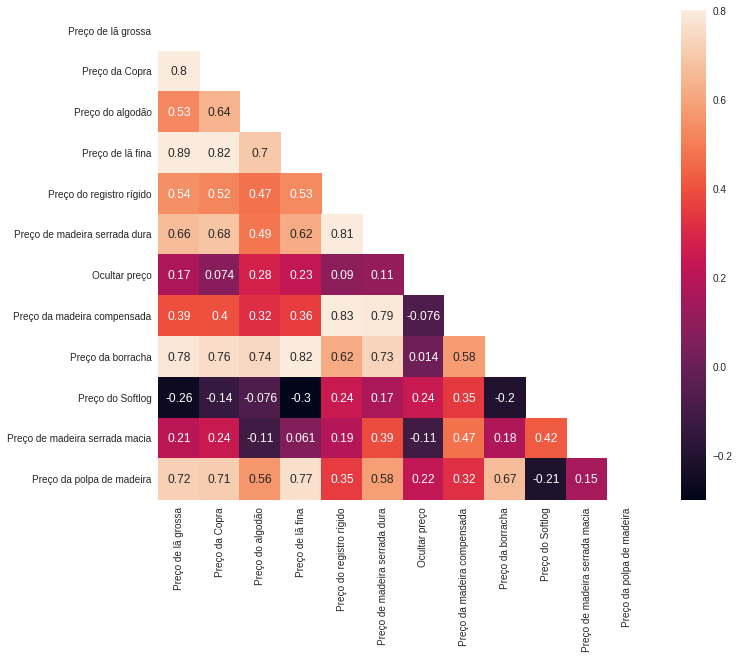

In [26]:
fig = plt.figure(figsize = (12, 9))
mask = np.triu(np.ones_like(correl, dtype=bool))
sns.heatmap(correl, vmax = .8,mask=mask, square = True, annot = True)
plt.show()

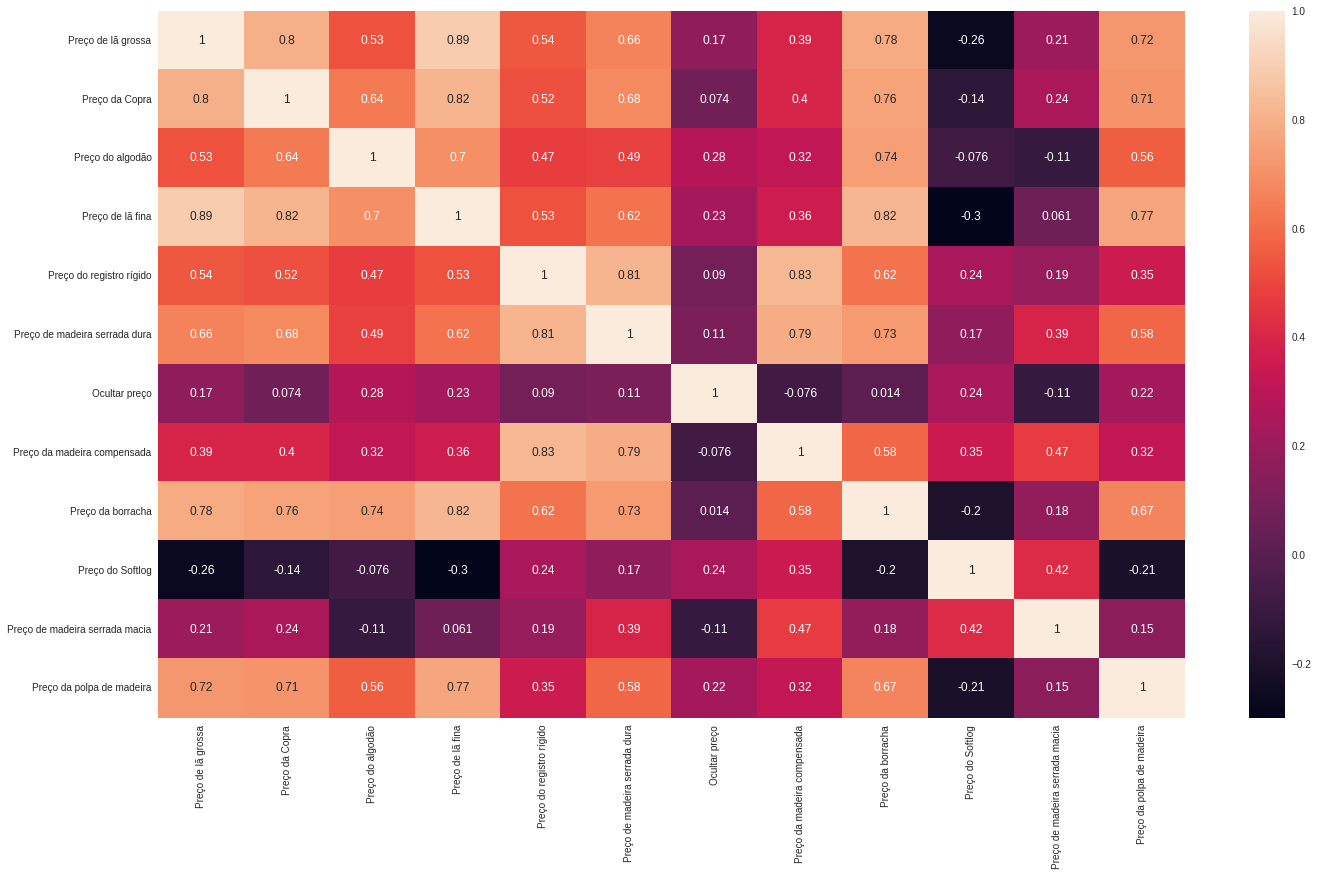

In [27]:
plt.figure(figsize=(23,13))
dfcor=['Preço de lã grossa', 'Preço da Copra', 'Preço do algodão','Preço de lã fina','Preço do registro rígido','Preço de madeira serrada dura','Ocultar preço','Preço da madeira compensada','Preço da borracha','Preço do Softlog','Preço de madeira serrada macia','Preço da polpa de madeira']
correlacn = df[dfcor].corr()
sns.heatmap(correlacn, annot=True)
plt.show()

# A variação dos preços das matérias primas fica dessa maneira: a maioria das variações teve um decréscimo de 5%.


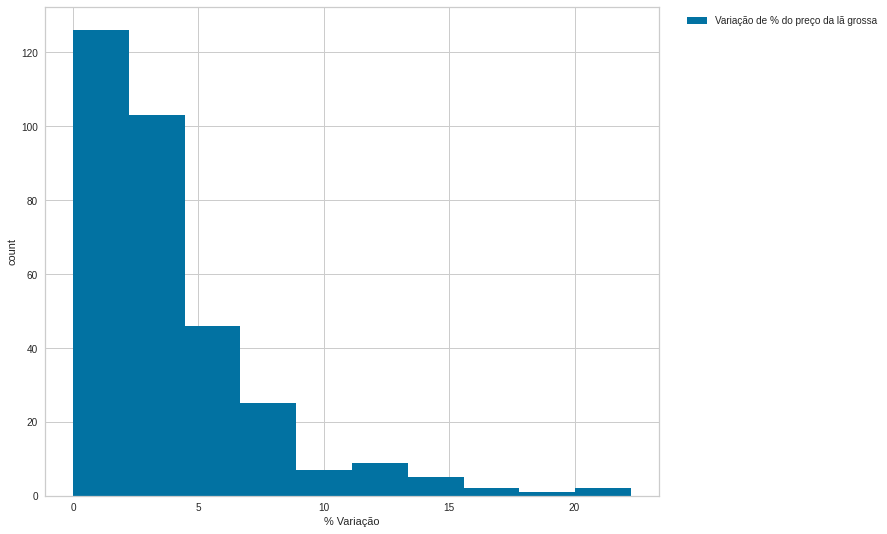

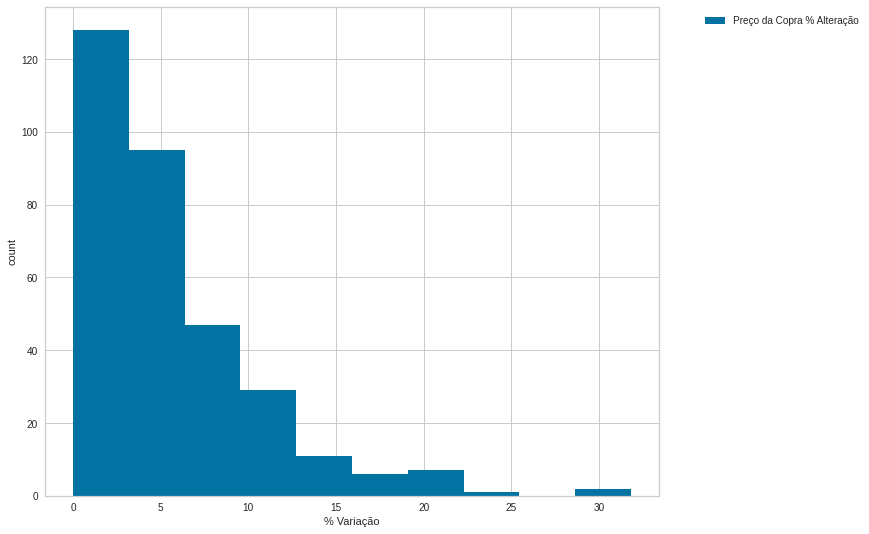

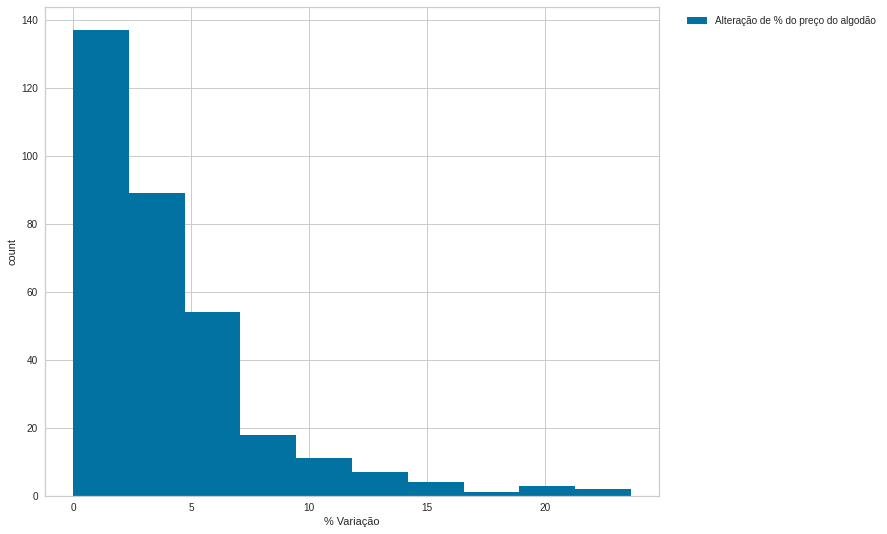

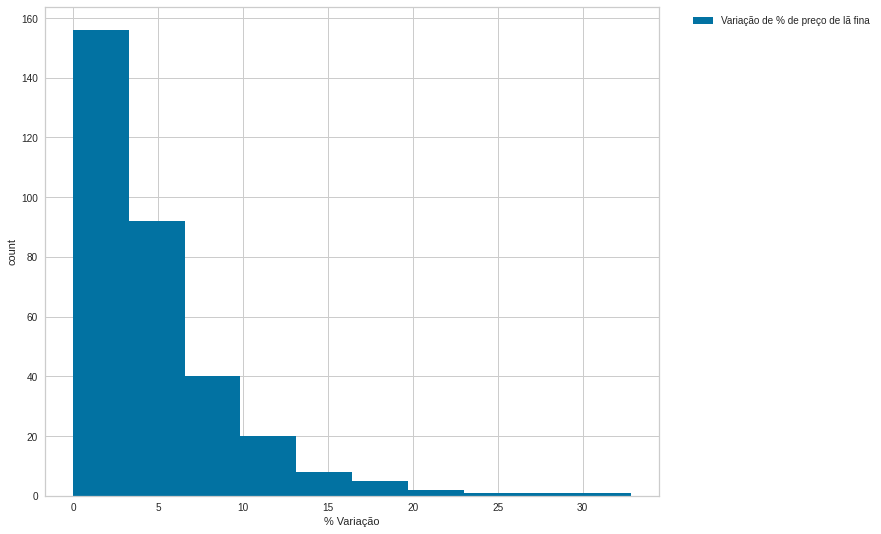

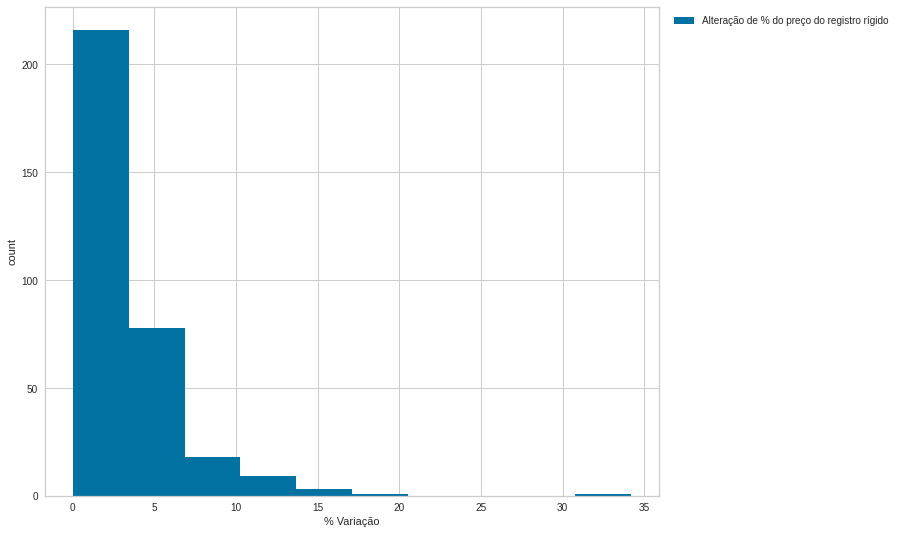

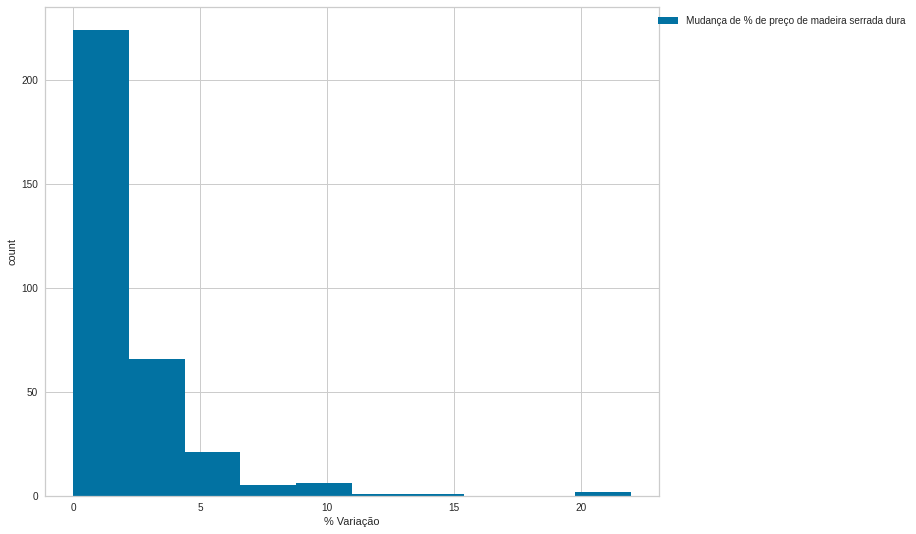

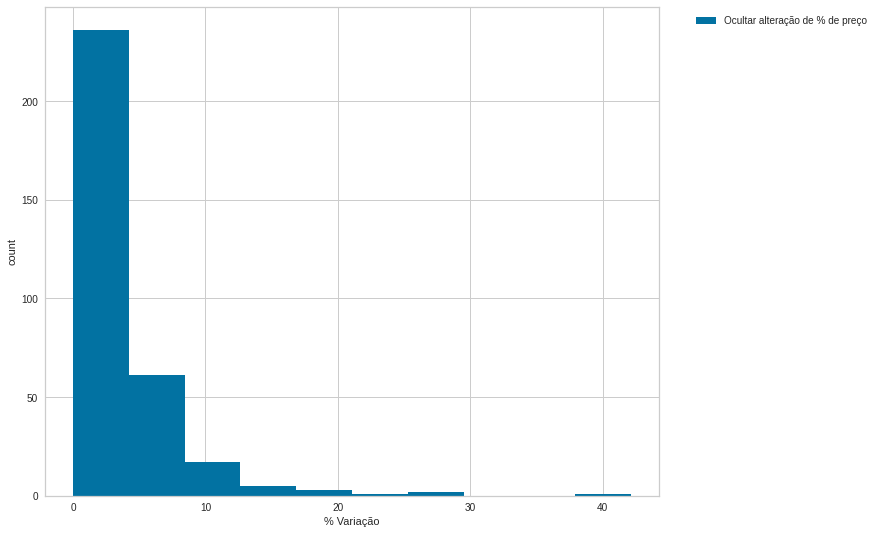

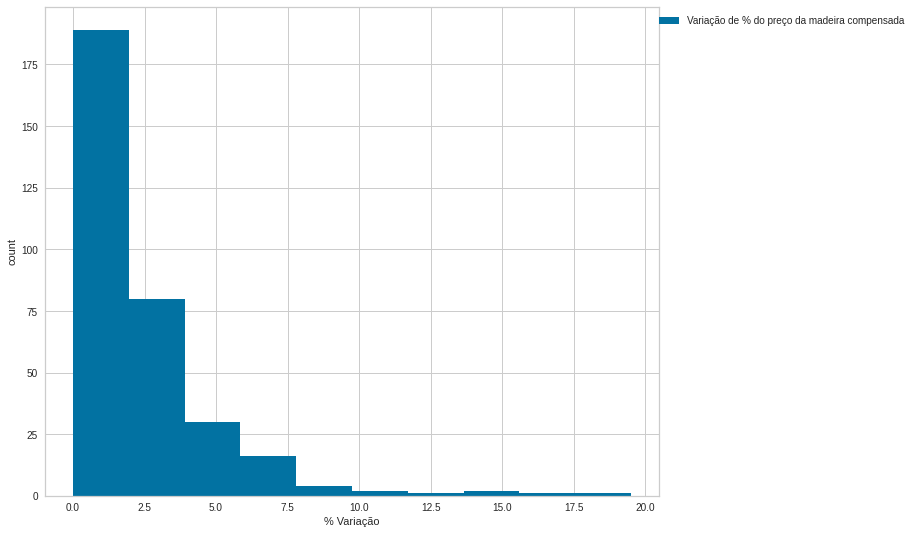

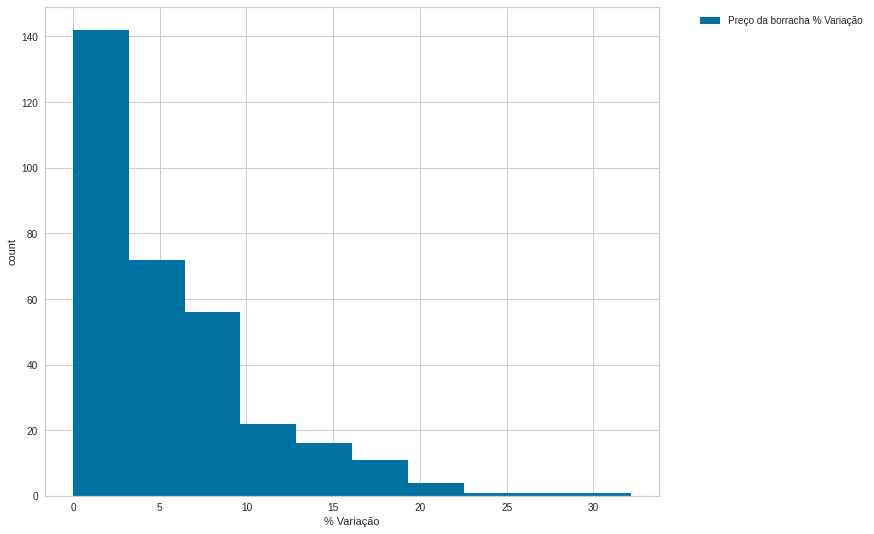

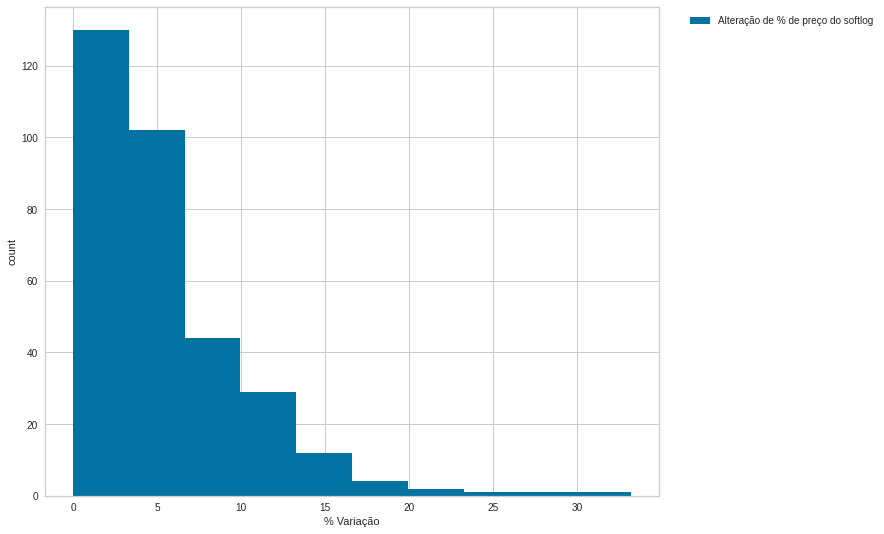

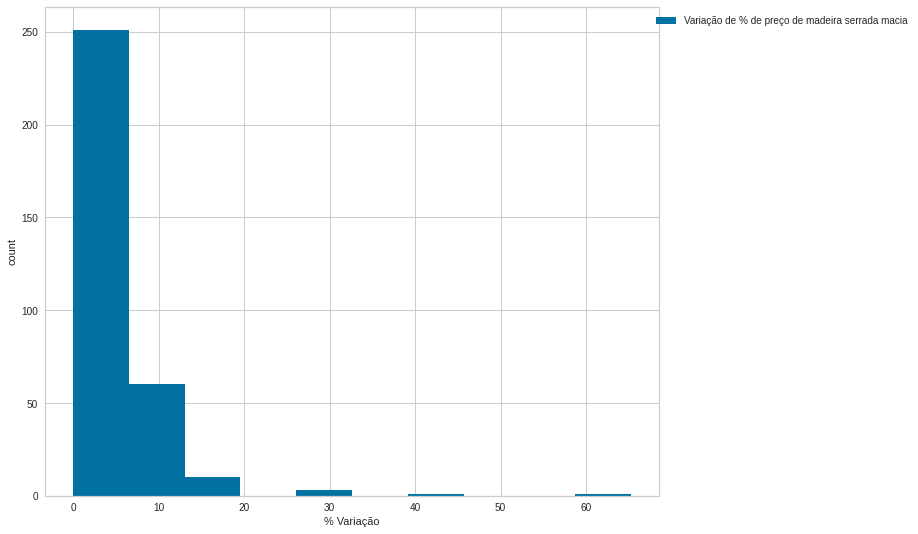

In [28]:
listavar=['Variação de % do preço da lã grossa','Preço da Copra % Alteração','Alteração de % do preço do algodão','Variação de % de preço de lã fina','Alteração de % do preço do registro rígido', 'Mudança de % de preço de madeira serrada dura','Ocultar alteração de % de preço',
'Variação de % do preço da madeira compensada', 'Preço da borracha % Variação','Alteração de % de preço do softlog','Variação de % de preço de madeira serrada macia']
for i in range(len(listavar)):
    plt.figure(figsize=(12,12))
    df[listavar[i]].hist(figsize=(11, 9), linewidth=1)
    plt.xlabel('% Variação')
    plt.ylabel('count')
    plt.legend(listavar[i:],loc='upper center',bbox_to_anchor=(1.2,1))


Text(0.5, 0.98, 'Comparação de preços')

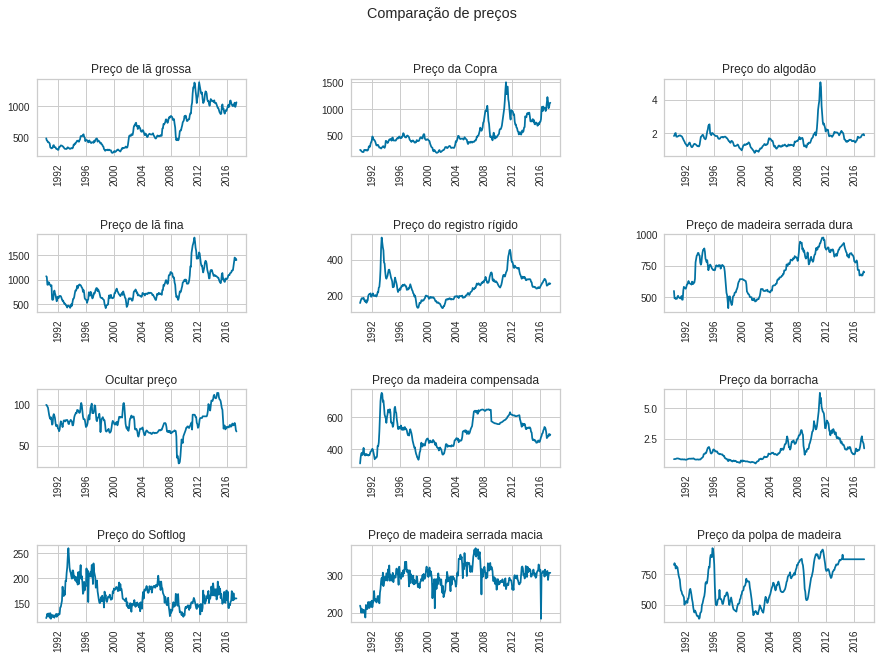

In [29]:
plt.figure(figsize=(15, 10))
matprim=['Preço de lã grossa', 'Preço da Copra', 'Preço do algodão','Preço de lã fina','Preço do registro rígido','Preço de madeira serrada dura','Ocultar preço','Preço da madeira compensada','Preço da borracha','Preço do Softlog','Preço de madeira serrada macia','Preço da polpa de madeira']
for i in range(len(matprim)):
    plt.subplot(4,3,i+1)
    plt.subplots_adjust( hspace=1 ,wspace=0.5)
    plt.title(matprim[i])
    plt.plot(df[matprim[i]])
    plt.xticks(rotation=90)
plt.suptitle("Comparação de preços")

## As de maiores valores são a de madeira serrada dura e madeira compensada.Vamos ao gráfico das duas:

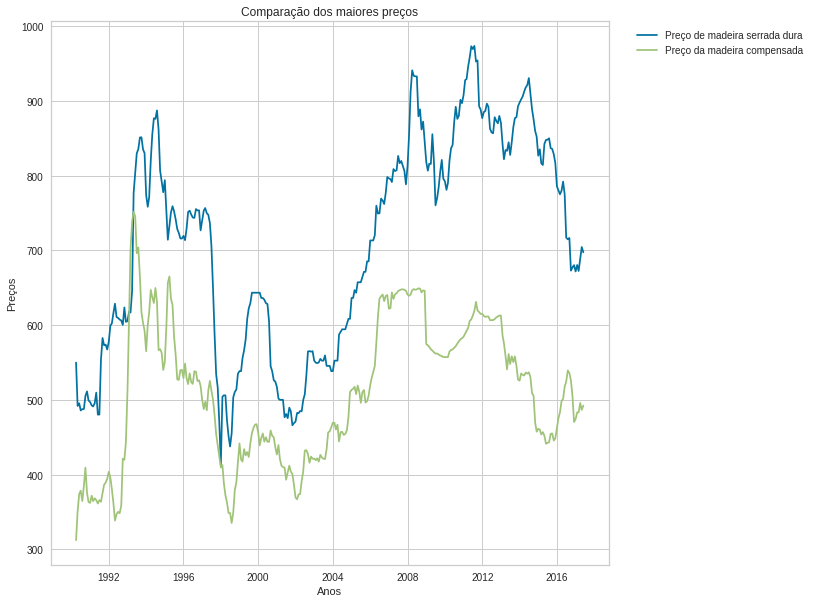

In [30]:
plt.figure(figsize=(10, 10))
plt.plot(df[['Preço de madeira serrada dura','Preço da madeira compensada']])
plt.title("Comparação dos maiores preços")
plt.xlabel('Anos')
plt.ylabel('Preços')
plt.legend(['Preço de madeira serrada dura','Preço da madeira compensada'],loc='upper center',bbox_to_anchor=(1.2,1))

## As de menores valores são o do algodão e o da borracha.Vamos ao gráfico dos dois:

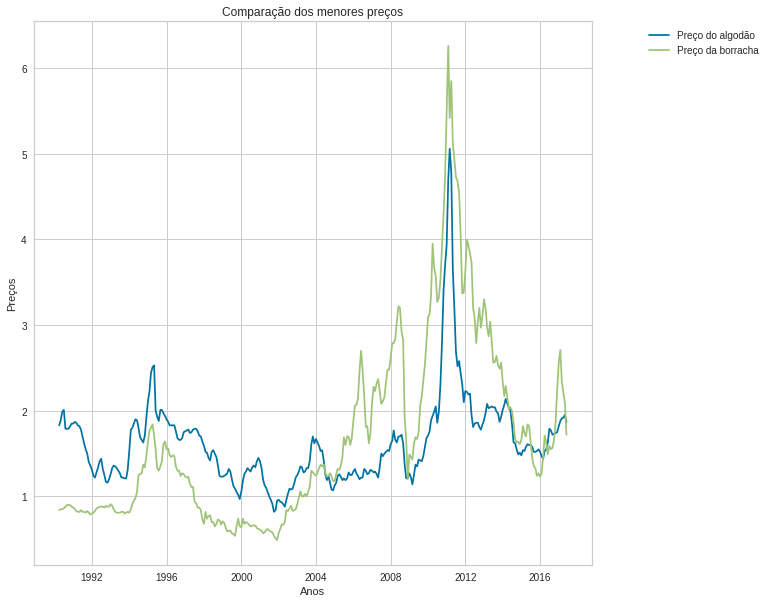

In [31]:
plt.figure(figsize=(10,10))
plt.plot(df[['Preço do algodão','Preço da borracha']])
plt.title("Comparação dos menores preços")
plt.xlabel('Anos')
plt.ylabel('Preços')
plt.legend(['Preço do algodão','Preço da borracha'],loc='upper center',bbox_to_anchor=(1.2,1))

##A borracha quanto esteve em baixa os preços foram inferiores ao do algodão, com exceção do ano 2005, onde sua alta começou a superar o algodão e com um decréscimo grande em 2009, equiparando ao preço do algodão. A partir daí o preço alavancou e só teve pequenas pioras em relação ao algodão em 2015.

#Problema

***Como prever o preço do algodão a partir das outras variáveis? Como o valor dele é o menor, seria financeiramente viável continuar sua produção?*** 

## Criando um novo df com as variáveis somente de valores, já que o problema central envolve valores e não variações.

In [32]:
df1=df.loc[:,['Preço de lã grossa', 'Preço da Copra', 'Preço do algodão','Preço de lã fina','Preço do registro rígido','Preço de madeira serrada dura','Ocultar preço','Preço da madeira compensada','Preço da borracha','Preço do Softlog','Preço de madeira serrada macia','Preço da polpa de madeira']]
df1

,Preço de lã grossa,Preço da Copra,Preço do algodão,Preço de lã fina,Preço do registro rígido,Preço de madeira serrada dura,Ocultar preço,Preço da madeira compensada,Preço da borracha,Preço do Softlog,Preço de madeira serrada macia,Preço da polpa de madeira
Mês,,,,,,,,,,,,
1990-04-01,482.34,236.00,1.83,1071.63,161.20,549.91,100.00,312.36,0.84,120.66,218.76,829.29
1990-05-01,447.26,234.00,1.89,1057.18,172.86,491.88,99.46,350.12,0.85,124.28,213.00,842.51
1990-06-01,440.99,216.00,1.99,898.24,181.67,495.39,97.90,373.94,0.85,129.45,200.00,831.35
1990-07-01,418.44,205.00,2.01,895.83,187.96,485.86,96.75,378.48,0.86,124.23,210.05,798.83
1990-08-01,418.44,198.00,1.79,951.22,186.13,487.52,91.89,364.60,0.88,129.70,208.30,818.74
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-01,1029.58,1146.25,1.88,1368.14,263.45,680.49,76.58,483.23,2.71,157.58,287.43,875.00
2017-03-01,1059.60,1016.00,1.91,1454.83,263.48,672.48,77.93,483.27,2.35,160.05,300.42,875.00
2017-04-01,991.12,1044.00,1.92,1404.98,270.34,688.44,75.43,495.87,2.21,159.84,306.60,875.00


### Retornando valores negativos para df1

In [60]:
df1.isnull().sum()

Preço de lã grossa                0
Preço da Copra                    0
Preço do algodão                  0
Preço de lã fina                  0
Preço do registro rígido          0
Preço de madeira serrada dura     0
Ocultar preço                     0
Preço da madeira compensada       0
Preço da borracha                 0
Preço do Softlog                  0
Preço de madeira serrada macia    0
Preço da polpa de madeira         0
dtype: int64

### Correlação somente dos valores

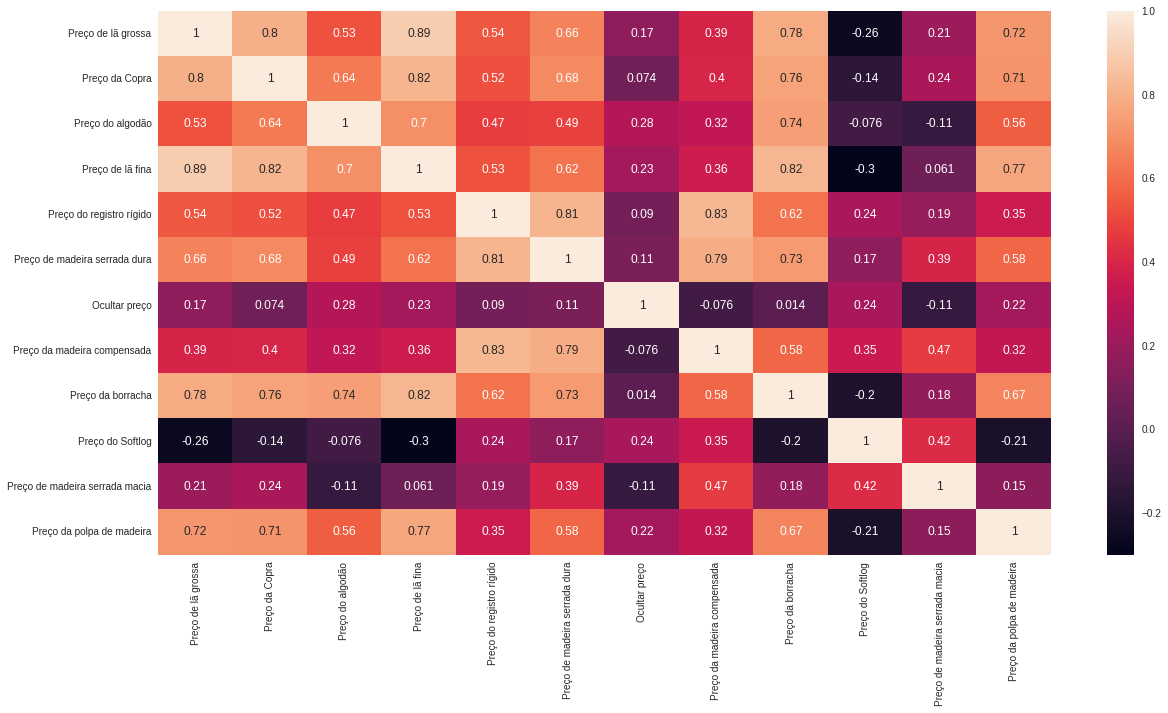

In [33]:
fig = plt.figure(figsize = (20, 10))
sns.heatmap( df1.corr() , annot=True)

#Regressão Linear

###Correlação com a lã  fina (uma das maiores correlações)

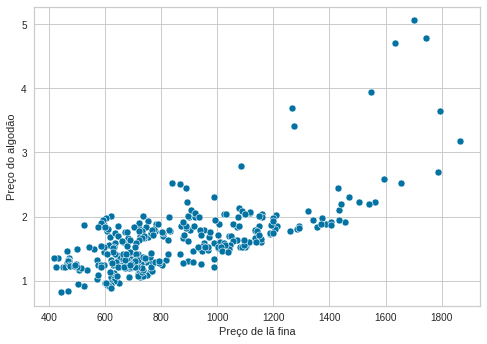

In [34]:
sns.scatterplot(data=df1, x='Preço de lã fina', y='Preço do algodão')

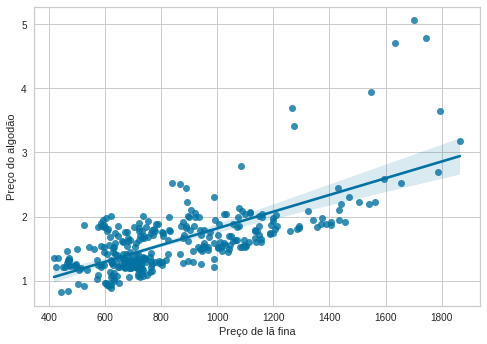

In [35]:
sns.regplot(data=df1, x= 'Preço de lã fina', y= 'Preço do algodão')

###Correlação com a copra (também uma das maiores correlações)

---



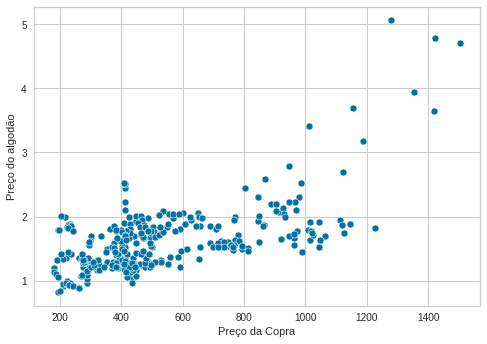

In [36]:
sns.scatterplot(data=df1, x='Preço da Copra', y='Preço do algodão')

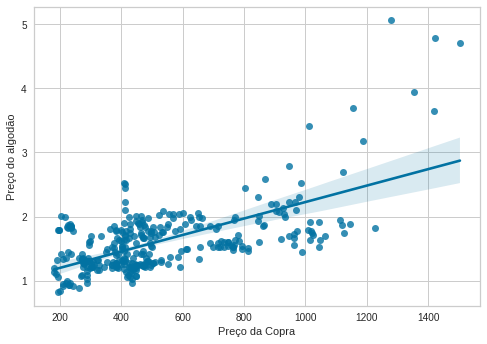

In [37]:
sns.regplot(data=df1, x='Preço da Copra', y='Preço do algodão')

### Correlação com o Softlog (a menor correlação)

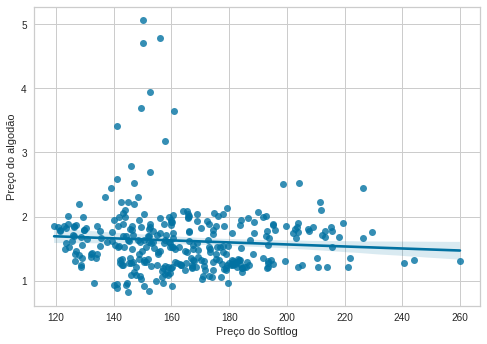

In [38]:
sns.regplot(data=df, x='Preço do Softlog', y='Preço do algodão')

In [39]:
df1.tail()

,Preço de lã grossa,Preço da Copra,Preço do algodão,Preço de lã fina,Preço do registro rígido,Preço de madeira serrada dura,Ocultar preço,Preço da madeira compensada,Preço da borracha,Preço do Softlog,Preço de madeira serrada macia,Preço da polpa de madeira
Mês,,,,,,,,,,,,
2017-02-01,1029.58,1146.25,1.88,1368.14,263.45,680.49,76.58,483.23,2.71,157.58,287.43,875.0
2017-03-01,1059.60,1016.00,1.91,1454.83,263.48,672.48,77.93,483.27,2.35,160.05,300.42,875.0
2017-04-01,991.12,1044.00,1.92,1404.98,270.34,688.44,75.43,495.87,2.21,159.84,306.60,875.0
2017-05-01,1019.95,1112.50,1.95,1433.47,265.28,704.52,69.36,486.59,2.10,159.84,306.60,875.0
2017-06-01,1065.81,1119.00,1.87,1403.83,268.39,697.44,67.59,492.29,1.72,159.84,306.60,875.0


# Usando o sklearn

### Regressão Linear

###Levando em consideração as maiores e a menor correlação, é melhor fazer os modelos utilizando todas as outras variáveis.

In [40]:
 x= df1.drop(columns=['Preço do algodão'])
y= df1['Preço do algodão']

### Testando o modelo

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [42]:
reg = LinearRegression()

In [43]:
reg.fit( x_train, y_train )

LinearRegression()

In [44]:
reg.coef_

array([-9.05819955e-04,  6.37089944e-04,  5.09088495e-04,  8.30627235e-04,
       -6.18236003e-04,  7.23385481e-03, -7.20488578e-04,  4.07177377e-01,
        3.96665503e-03, -3.24220307e-03,  2.27426982e-04])

In [45]:
reg.intercept_

0.9182248902776036

In [46]:
y_pred = reg.predict(x_test)

In [47]:
y_pred

array([1.22445279, 1.34605545, 4.02050289, 1.80453101, 1.31617522,
       1.90305641, 1.93337344, 1.2202077 , 1.51655646, 1.40910772,
       1.22673583, 1.6014922 , 1.86595434, 1.02287808, 1.98113259,
       0.96291067, 1.20953597, 1.22751024, 1.5899587 , 1.77454237,
       1.70438969, 1.20124309, 1.36966421, 1.92741266, 1.42486223,
       2.41192007, 1.3310564 , 1.43636932, 1.43619616, 1.37471864,
       2.16041599, 1.51840426, 3.27431193, 1.2268269 , 1.47132043,
       1.28070255, 1.88432831, 1.63004997, 1.23806615, 1.32919085,
       2.03929785, 1.26554435, 1.4090644 , 1.32569415, 1.35670277,
       1.28288844, 1.80440247, 1.79481595, 1.95934535, 1.55438144,
       1.67728489, 1.54860328, 1.76924406, 1.79462099, 1.80522445,
       1.81482614, 1.98238547, 1.33517626, 1.7523881 , 1.77947632,
       2.12697533, 3.12593392, 1.98026971, 1.63448247, 2.38640947,
       1.28422998, 1.50209003, 1.44219385, 1.48551323, 1.44640125,
       1.23802903, 1.05512692, 1.74152654, 2.25173952, 1.01254

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [49]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [50]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'Root mean squared error: {r2:.2f}')

Mean absolute error: 0.20
Mean squared error: 0.06
Root mean squared error: 0.25
Root mean squared error: 0.82


### Random Forest

In [51]:
df1

,Preço de lã grossa,Preço da Copra,Preço do algodão,Preço de lã fina,Preço do registro rígido,Preço de madeira serrada dura,Ocultar preço,Preço da madeira compensada,Preço da borracha,Preço do Softlog,Preço de madeira serrada macia,Preço da polpa de madeira
Mês,,,,,,,,,,,,
1990-04-01,482.34,236.00,1.83,1071.63,161.20,549.91,100.00,312.36,0.84,120.66,218.76,829.29
1990-05-01,447.26,234.00,1.89,1057.18,172.86,491.88,99.46,350.12,0.85,124.28,213.00,842.51
1990-06-01,440.99,216.00,1.99,898.24,181.67,495.39,97.90,373.94,0.85,129.45,200.00,831.35
1990-07-01,418.44,205.00,2.01,895.83,187.96,485.86,96.75,378.48,0.86,124.23,210.05,798.83
1990-08-01,418.44,198.00,1.79,951.22,186.13,487.52,91.89,364.60,0.88,129.70,208.30,818.74
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-01,1029.58,1146.25,1.88,1368.14,263.45,680.49,76.58,483.23,2.71,157.58,287.43,875.00
2017-03-01,1059.60,1016.00,1.91,1454.83,263.48,672.48,77.93,483.27,2.35,160.05,300.42,875.00
2017-04-01,991.12,1044.00,1.92,1404.98,270.34,688.44,75.43,495.87,2.21,159.84,306.60,875.00


### Testando o modelo

In [52]:
 x= df1.drop(columns=['Preço do algodão'])
 y= df1['Preço do algodão']

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [54]:
arveres = RandomForestRegressor(n_estimators = 300, min_samples_leaf = 2,random_state=0)

In [55]:
arveres.fit(x_train,y_train)

RandomForestRegressor(min_samples_leaf=2, n_estimators=300, random_state=0)

In [56]:
p = arveres.predict(x_test)

In [57]:
from sklearn.metrics import  mean_squared_error

In [58]:
np.sqrt(mean_squared_error(y_test,p))

0.1747701829956646

In [59]:
default -> 0.18546171621609142
n_estimators = 200 - > 0.1822218952017261
n_estimators =300 - >  0.17845747332839937
n_estimators =300, msl=2- >  0.1747701829956646
#n_estimators =300, msl=3- > 0.17643425114686925
#n_estimators = 400 - > 0.17890833811471576
#n_estimators = 500 - > 0.17975312094338908

SyntaxError: ignored

### Gradient Boost

In [61]:
 x= df1.drop(columns=['Preço do algodão'])
 y= df1['Preço do algodão']

####Testando e treinando o modelo

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [63]:
simplegb= GradientBoostingRegressor()


In [64]:
simplegb.fit(x_train,y_train.values.ravel())
gbpred = simplegb.predict(x_test)


In [65]:
mean_squared_error(y_test,p)

0.030544616864338094

In [66]:
mean_squared_error(y_test,gbpred)

0.0363362838808176

In [67]:
#Criamos o dataset com as previsões
to_graph = pd.DataFrame({"valor_real":y_test,"valor_randforest":p, "valor_gboost":gbpred, "valor_reglinear":y_pred}).sort_values(by="valor_real",ascending=True)

In [68]:
to_graph

,valor_real,valor_randforest,valor_gboost,valor_reglinear
Mês,,,,
2001-11-01,0.84,0.989298,1.003431,1.022878
2001-09-01,0.91,0.998975,1.013487,1.120101
2002-04-01,0.91,1.052831,1.023112,1.227510
2001-12-01,0.95,0.988179,0.990926,1.012550
2002-06-01,0.96,1.274587,1.265716,1.209536
...,...,...,...,...
1995-04-01,2.51,2.072026,2.057374,1.980270
2011-06-01,3.18,3.264030,2.759996,3.274312
2011-05-01,3.65,4.180274,4.741971,3.518336


####Criando o gráfico de comparações entre os modelos e os valores reais

In [69]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=to_graph['valor_real'], y=to_graph['valor_randforest'],
                    mode='lines',
                    name='Random Forest'))

fig.add_trace(go.Scatter(x=to_graph['valor_real'], y=to_graph['valor_gboost'],
                    mode='lines', 
                    name='Gradient Boost'))

fig.add_trace(go.Scatter(x=to_graph['valor_real'], y=to_graph['valor_reglinear'],
                    mode='lines', 
                    name='Regressão Linear'))


fig.show()

In [70]:
rd = pd.DataFrame({"valor_real":y_test,"valor_calc":p}).reset_index().drop(columns=["Mês"])
rd['modelo'] = 'RandForest'
gb = pd.DataFrame({"valor_real":y_test,"valor_calc":gbpred}).reset_index().drop(columns=["Mês"])
gb['modelo'] = 'GradBoost'
lr = pd.DataFrame({"valor_real":y_test,"valor_calc":y_pred}).reset_index().drop(columns=["Mês"])
lr['modelo'] = 'RegLinear'

In [71]:
to_graph1 = pd.concat([rd,gb,lr])

# Conclusão

## Plotando os gráficos de dispersão

In [72]:
import plotly.express as px

print(f'O erro quadratico médio do modelo Random Forest foi {mean_squared_error(y_test,p):.4f}')
print(f'O erro quadratico médio do modelo Gradient Boost foi {mean_squared_error(y_test,gbpred):.4f}')
print(f'O erro quadratico médio do modelo Regressão Linear foi {mean_squared_error(y_test,y_pred):.4f}')

fig = px.scatter(to_graph1, x="valor_real", y="valor_calc", color="modelo", trendline="ols")
fig.show()


O erro quadratico médio do modelo Random Forest foi 0.0305
O erro quadratico médio do modelo Gradient Boost foi 0.0363
O erro quadratico médio do modelo Regressão Linear foi 0.0617


# Análise sobre o melhor modelo

### Como demonstrado na plotagem acima e nos erros quadráticos, apesar de difrença mínima para o modelo Gradient Boost, o Random Forest apresentou a melhor perfomance para solucionar a viabilidade da compensação da venda do algodão.